In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import seaborn as sns
%matplotlib inline

In [2]:
models = []
acc = []
precision = []
recall = []
f1 = []

In [3]:
df = pd.read_csv('train.csv')
a = pd.read_csv('test.csv')

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
df.shape

(54808, 14)

In [7]:
df.describe(include=['O'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [8]:
df.nunique() #employee_id has distinct value for each record which can be removed

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [9]:
# Checking for imbalance data for target variable 
(df.groupby('is_promoted')['employee_id'].count()/df['employee_id'].count())*100
# Data available in target variable whould be highly imbalance 91% is not promoted and 9% is promoted.

is_promoted
0    91.482995
1     8.517005
Name: employee_id, dtype: float64

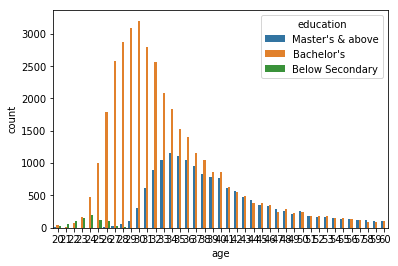

In [10]:
sns.countplot(x='age',hue='education',data=df)

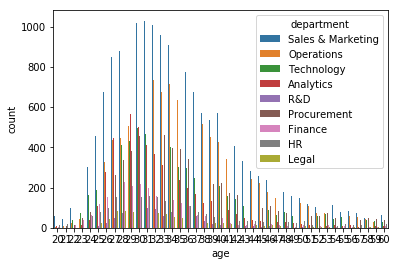

In [11]:
sns.countplot(x='age',hue='department',data=df)

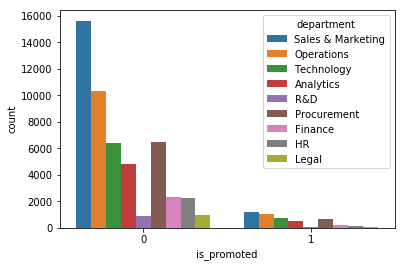

In [12]:
sns.countplot(x='is_promoted',hue='department',data = df)

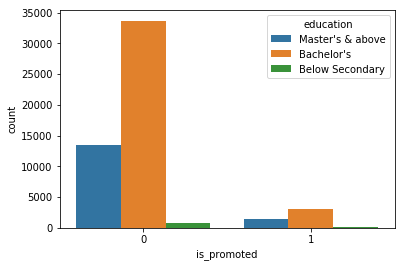

In [13]:
sns.countplot(x='is_promoted',hue='education',data = df)

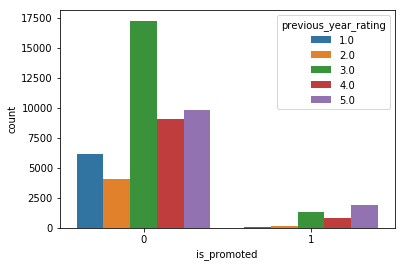

In [14]:
sns.countplot(x='is_promoted',hue='previous_year_rating',data = df)

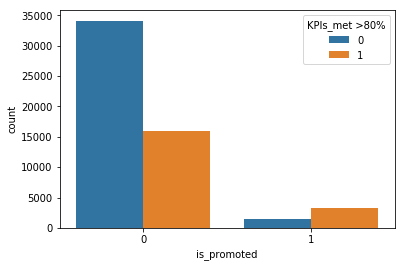

In [15]:
sns.countplot(x = 'is_promoted',hue = 'KPIs_met >80%',data = df)

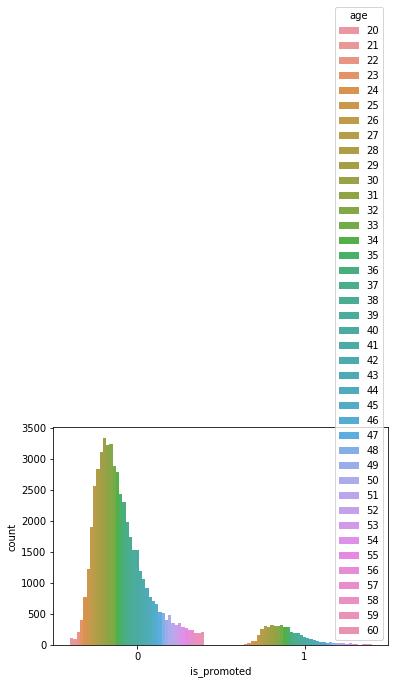

In [16]:
sns.countplot(x = 'is_promoted',hue = 'age',data = df)

In [17]:
# Education Null Imputation
df.groupby('education')['department'].count()

education
Bachelor's          36669
Below Secondary       805
Master's & above    14925
Name: department, dtype: int64

In [18]:
df.groupby('education')['age'].median()

education
Bachelor's          32
Below Secondary     24
Master's & above    38
Name: age, dtype: int64

In [19]:
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [20]:
def impute_education(cols):
    age = cols[0]
    education = cols[1]
    if pd.isnull(education):
        if age>=38:
            return "Master's & above"
        if age>24:
            return "Bachelor's"
        else:
            return 'Below Secondary'
    else:
        return education

In [21]:
df['education'] = df[['age','education']].apply(impute_education,axis=1)

In [22]:
df['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [23]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [24]:
# Previous_year_rating_Imputation
df.fillna({'previous_year_rating':3},inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 4.8+ MB


In [26]:
# One Hot Encoding
Dept = pd.get_dummies(df['department'],drop_first = True)

In [27]:
Edu = pd.get_dummies(df['education'],drop_first=True)

In [28]:
Rect = pd.get_dummies(df['recruitment_channel'],drop_first=True)

In [29]:
Gen = pd.get_dummies(df['gender'],drop_first = True)

In [30]:
df =pd.concat([df,Dept,Edu,Gen,Rect],axis=1)

In [31]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,m,referred,sourcing
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,0,0,1,0,0,1,0,0,1
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,1,0,0,0,0,0,0,1,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,0,0,1,0,0,0,1,0,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,0,0,1,0,0,0,1,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,0,0,0,1,0,0,1,0,0


In [32]:
df.drop(['employee_id','department','region','education','gender','recruitment_channel'],axis = 1,inplace=True)

In [33]:
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,...,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,m,referred,sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [34]:
df.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
Finance                 0
HR                      0
Legal                   0
Operations              0
Procurement             0
R&D                     0
Sales & Marketing       0
Technology              0
Below Secondary         0
Master's & above        0
m                       0
referred                0
sourcing                0
dtype: int64

In [35]:
df.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'Finance', 'HR', 'Legal', 'Operations', 'Procurement', 'R&D',
       'Sales & Marketing', 'Technology', 'Below Secondary',
       'Master's & above', 'm', 'referred', 'sourcing'],
      dtype='object')

In [36]:
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,...,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,m,referred,sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [37]:
df.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'Finance', 'HR', 'Legal', 'Operations', 'Procurement', 'R&D',
       'Sales & Marketing', 'Technology', 'Below Secondary',
       'Master's & above', 'm', 'referred', 'sourcing'],
      dtype='object')

In [38]:
df.shape

(54808, 21)

In [39]:
# Classification
# Now we have to scale the column
X = df.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20]].values   # we ware compare on the basis of age and education. 
y = df.iloc[:,7].values    # we have to declare target variable i.e. is_promoted(because there is no missing values)

In [40]:
print(X)

[[ 1. 35.  5. ...  0.  0.  1.]
 [ 1. 30.  5. ...  1.  0.  0.]
 [ 1. 34.  3. ...  1.  0.  1.]
 ...
 [ 1. 27.  5. ...  1.  0.  0.]
 [ 1. 29.  1. ...  1.  0.  1.]
 [ 1. 27.  1. ...  1.  0.  0.]]


In [41]:
print(y)

[0 0 0 ... 0 0 0]


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

In [43]:
# Now We have to go for Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [44]:
X_train_sc = sc.fit_transform(X_train)

In [45]:
X_test_sc = sc.transform(X_test)

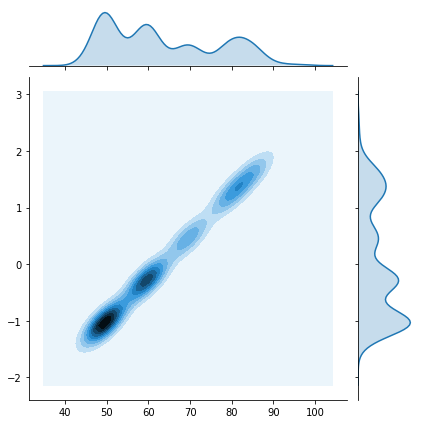

In [46]:
sns.jointplot(X_train[:,6],X_train_sc[:,6],kind='kde')

In [47]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train,y_train.ravel())

In [48]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 3068
Before OverSampling, counts of label '0': 32557 



In [49]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 32557
After OverSampling, counts of label '0': 32557


In [50]:
# Do it on testing data
X_test_res, y_test_res = sm.fit_sample(X_test_sc, y_test.ravel())

In [51]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

Before OverSampling, counts of label '1': 1600
Before OverSampling, counts of label '0': 17583 



In [52]:
print("After OverSampling, counts of label '1': {}".format(sum(y_test_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_res==0)))

After OverSampling, counts of label '1': 17583
After OverSampling, counts of label '0': 17583


In [53]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [54]:
lr.fit(X_train_res,y_train_res)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
# pk.dump(lr, open('logistic_regression.sav','wb'))

In [56]:
lr.intercept_

array([-24.18731924])

In [57]:
lr.coef_

array([[-0.24926074, -0.04401469,  0.31577545,  0.03118845,  2.64023102,
         2.11065995,  0.27273857,  5.82500649,  8.09832197,  5.26378955,
         6.03887114,  3.45043739, -1.02764633,  8.78187892,  1.310858  ,
         0.0201886 ,  0.39981632,  0.0833454 , -0.18643172, -0.05974146]])

In [58]:
lr.n_iter_

array([21], dtype=int32)

In [59]:
probs = lr.predict_proba(X_test_res)
probs

array([[9.47522090e-01, 5.24779104e-02],
       [1.00000000e+00, 1.23960562e-10],
       [1.00000000e+00, 3.55479832e-14],
       ...,
       [9.99999895e-01, 1.05183457e-07],
       [9.97440650e-01, 2.55935021e-03],
       [1.00000000e+00, 7.11018209e-16]])

In [60]:
proba = lr.predict_log_proba(X_test_res)    # Odds = p/1-p
proba

array([[-5.39050287e-02, -2.94736295e+00],
       [-1.23960509e-10, -2.28110576e+01],
       [-3.55271368e-14, -3.09678930e+01],
       ...,
       [-1.05183462e-07, -1.60675598e+01],
       [-2.56263095e-03, -5.96800188e+00],
       [-6.66133815e-16, -3.48798336e+01]])

In [61]:
# loaded_model_lr = pk.load(open('logistic_regression.sav', 'rb'))

In [62]:
print("Train:",X_train_sc.shape,"Test:=",y_train.shape)

Train: (35625, 20) Test:= (35625,)


In [63]:
# Evaluation of Logistic Regression
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)
#from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [64]:
y_pred = lr.predict(X_test_res)

In [65]:
X_train_res.shape

(65114, 20)

In [66]:
X_test_res.shape

(35166, 20)

In [67]:
# Logistic Regression
def append_metrix(y_test,y_pred,model_name):
    models.append(model_name)
    acc.append(accuracy_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
    print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
    print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
    print("Precision Score:\n",precision_score(y_test,y_pred))
    print("Recall score: \n",recall_score(y_test,y_pred))
    print("F1 score: \n",f1_score(y_test,y_pred))

In [68]:
append_metrix(y_test_res,y_pred,"Logistic Regression")

confusion Metrix :
 [[17197   386]
 [16911   672]]
Accuracy Score :
 0.5081328555991583
Precision Score:
 0.6351606805293005
Recall score: 
 0.0382187340044361
F1 score: 
 0.07209913631242959


In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_res,y_train_res)
# models.append('KNN')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [70]:
pred1 = knn.predict(X_test_res)

In [71]:
def append_metrix(y_test,pred1,model_name):
    models.append(model_name)
    acc.append(accuracy_score(y_test,pred1))
    precision.append(precision_score(y_test,pred1))
    recall.append(recall_score(y_test,pred1))
    f1.append(f1_score(y_test,pred1))
    print("confusion Metrix :\n",confusion_matrix(y_test,pred1))
    print("Accuracy Score :\n",accuracy_score(y_test,pred1))
    print("Precision Score:\n",precision_score(y_test,pred1))
    print("Recall score: \n",recall_score(y_test,pred1))
    print("F1 score: \n",f1_score(y_test,pred1))

In [72]:
append_metrix(y_test_res,pred1,"KNN")

confusion Metrix :
 [[17583     0]
 [17583     0]]
Accuracy Score :
 0.5
Precision Score:
 0.0
Recall score: 
 0.0
F1 score: 
 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
# By Using SVM
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train_res,y_train_res)
# models.append('SVM')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [74]:
pred2 = svc.predict(X_test_res)

In [75]:
def append_metrix(y_test,pred2,model_name):
    models.append(model_name)
    acc.append(accuracy_score(y_test,pred2))
    precision.append(precision_score(y_test,pred2))
    recall.append(recall_score(y_test,pred2))
    f1.append(f1_score(y_test,pred2))
    print("confusion Metrix :\n",confusion_matrix(y_test,pred2))
    print("Accuracy Score :\n",accuracy_score(y_test,pred2))
    print("Precision Score:\n",precision_score(y_test,pred2))
    print("Recall score: \n",recall_score(y_test,pred2))
    print("F1 score: \n",f1_score(y_test,pred2))

In [76]:
append_metrix(y_test_res,pred2,"SVM")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


confusion Metrix :
 [[17583     0]
 [17583     0]]
Accuracy Score :
 0.5
Precision Score:
 0.0
Recall score: 
 0.0
F1 score: 
 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
# By using Decision Tree
# For Display the Tree Objects
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [78]:
# Fitting Decision Tree Classification For training Dataset
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3,
                           random_state = 0)
dt.fit(X_train_res,y_train_res)
# models.append('Decison Tree')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [79]:
pred3 = dt.predict(X_test_res)

In [80]:
def append_metrix(y_test,pred3,model_name):
    models.append(model_name)
    acc.append(accuracy_score(y_test,pred3))
    precision.append(precision_score(y_test,pred3))
    recall.append(recall_score(y_test,pred3))
    f1.append(f1_score(y_test,pred3))
    print("confusion Metrix :\n",confusion_matrix(y_test,pred3))
    print("Accuracy Score :\n",accuracy_score(y_test,pred3))
    print("Precision Score:\n",precision_score(y_test,pred3))
    print("Recall score: \n",recall_score(y_test,pred3))
    print("F1 score: \n",f1_score(y_test,pred3))

In [81]:
append_metrix(y_test_res,pred3,"Decision Tree")

confusion Metrix :
 [[11937  5646]
 [ 4959 12624]]
Accuracy Score :
 0.6984303019962463
Precision Score:
 0.6909688013136289
Recall score: 
 0.7179662173690496
F1 score: 
 0.7042088528156639


In [82]:
# By Using Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 5, criterion = 'entropy',
                           random_state = 0)
rf.fit(X_train_res,y_train_res)
# models.append('Random Forest')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [83]:
len(rf.estimators_)

5

In [84]:
pred4 = rf.predict(X_test_res)

In [85]:
append_metrix(y_test_res,pred4,"Random Forest")

confusion Metrix :
 [[13831  3752]
 [ 9747  7836]]
Accuracy Score :
 0.6161349030313371
Precision Score:
 0.6762167759751467
Recall score: 
 0.4456577375874424
F1 score: 
 0.5372458948956155


In [86]:
# By Using AdaBoost Classification Model
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = dt, n_estimators = 10,
                        algorithm = 'SAMME.R', random_state = 40)
adb.fit(X_train_res,y_train_res)
# models.append('AdaBoost')

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=10, random_state=40)

In [87]:
len(adb.estimators_)

10

In [88]:
pred5 = adb.predict(X_test_res)

In [89]:
append_metrix(y_test_res,pred5,"AdaBoost")

confusion Metrix :
 [[ 4585 12998]
 [ 5169 12414]]
Accuracy Score :
 0.48339305010521527
Precision Score:
 0.4885093656540217
Recall score: 
 0.7060228629926634
F1 score: 
 0.5774624956390277


In [90]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()

In [91]:
gbc.fit(X_train_res,y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [92]:
pred6=gbc.predict(X_test_res)

In [93]:
append_metrix(y_test_res,pred6,"Gradient Boosting")

confusion Metrix :
 [[13836  3747]
 [ 9127  8456]]
Accuracy Score :
 0.6339077518057215
Precision Score:
 0.6929443579447677
Recall score: 
 0.480919069555821
F1 score: 
 0.5677835224602162


In [94]:
models

['Logistic Regression',
 'KNN',
 'SVM',
 'Decision Tree',
 'Random Forest',
 'AdaBoost',
 'Gradient Boosting']

In [95]:
# Average Ensemble  (to combine all the model and it gives the best model)
# For Average Ensemble we have to use VotingClassifier (It reads all the trees with prediction and gives vote for output)
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators =[('Logistic Regression',lr),
                                   ('KNN',knn),
                                  ('SVM',svc),
                                  ('Decision Tree',dt),
                                  ('Random Forest',rf),
                                  ('AdaBoost',adb),
                                  ('Gradient Boosting',gbc)],
                     voting = 'hard')
vc.fit(X_train_res,y_train_res)
# models.append('Average Ensemble')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [96]:
model_dict = {'Models': models,
             'Accuracies': acc,
             'Precision': precision,
             'Recall': recall,
             'f1-score': f1}
model_dict

{'Models': ['Logistic Regression',
  'KNN',
  'SVM',
  'Decision Tree',
  'Random Forest',
  'AdaBoost',
  'Gradient Boosting'],
 'Accuracies': [0.5081328555991583,
  0.5,
  0.5,
  0.6984303019962463,
  0.6161349030313371,
  0.48339305010521527,
  0.6339077518057215],
 'Precision': [0.6351606805293005,
  0.0,
  0.0,
  0.6909688013136289,
  0.6762167759751467,
  0.4885093656540217,
  0.6929443579447677],
 'Recall': [0.0382187340044361,
  0.0,
  0.0,
  0.7179662173690496,
  0.4456577375874424,
  0.7060228629926634,
  0.480919069555821],
 'f1-score': [0.07209913631242959,
  0.0,
  0.0,
  0.7042088528156639,
  0.5372458948956155,
  0.5774624956390277,
  0.5677835224602162]}

In [97]:
model_df=pd.DataFrame(model_dict)
model_df

,Models,Accuracies,Precision,Recall,f1-score
0,Logistic Regression,0.508133,0.635161,0.038219,0.072099
1,KNN,0.500000,0.000000,0.000000,0.000000
2,SVM,0.500000,0.000000,0.000000,0.000000
3,Decision Tree,0.698430,0.690969,0.717966,0.704209
4,Random Forest,0.616135,0.676217,0.445658,0.537246
5,AdaBoost,0.483393,0.488509,0.706023,0.577462
6,Gradient Boosting,0.633908,0.692944,0.480919,0.567784


In [98]:
model_df = model_df.sort_values(['f1-score','Accuracies','Recall','Precision'],
                               ascending= False)
model_df

,Models,Accuracies,Precision,Recall,f1-score
3,Decision Tree,0.698430,0.690969,0.717966,0.704209
5,AdaBoost,0.483393,0.488509,0.706023,0.577462
6,Gradient Boosting,0.633908,0.692944,0.480919,0.567784
4,Random Forest,0.616135,0.676217,0.445658,0.537246
0,Logistic Regression,0.508133,0.635161,0.038219,0.072099
1,KNN,0.500000,0.000000,0.000000,0.000000
2,SVM,0.500000,0.000000,0.000000,0.000000


In [99]:
# Selection of best Model
best_model = model_df['Models'].values[0]
best_model

'Decision Tree'

In [100]:
# HyperParameter Tuning
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = gbc,   # Best model as that you get.
                            X = X_train_res,   
                            y = y_train_res,
                            cv = 10)  # cv = cross validation 
acMean = accuracies.mean()
acStd = accuracies.std()

In [101]:
acMean

0.9325676760757405

In [102]:
acStd

0.1053938021074612

In [103]:
accuracies

array([0.61640049, 0.96836609, 0.96575553, 0.96805897, 0.96851966,
       0.96805897, 0.96698403, 0.96927803, 0.96789555, 0.96635945])

In [104]:
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

In [105]:
# Define scorer
def f1_metric(y_test_res, y_pred1):
    score = f1_score(y_test_res, y_pred1)
    return score
def roc_metric(y_test_res, y_pred1):
    score = roc_auc_score(y_test_res, y_pred1)
    return score

In [106]:
roc_auc_scorer = make_scorer(roc_metric,greater_is_better=True)
f1_scorer = make_scorer(f1_metric,greater_is_better=True)

In [107]:
# By Using Grid Search Mechanism 
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [3,5,10],   # you can use any numbers, it wouldnt be affect the final result.
              "criterion":['gini','entropy'],
              "max_depth": [2,3,5],     # Here you can use any numbers but if more depth then it takes more time for output.
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}
grid_search = GridSearchCV(estimator = rf,   # It probably work on Random Forest.
                          param_grid = parameters,
                          scoring = f1_scorer,
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train_res,y_train_res)

In [108]:
best_accuracy = grid_search.best_score_

In [109]:
best_accuracy

0.8407650262385212

In [110]:
best_f1_Score = grid_search.best_score_

In [111]:
best_parameters = grid_search.best_params_

In [112]:
best_f1_Score

0.8407650262385212

In [113]:
best_parameters

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.005,
 'n_estimators': 10}

In [114]:
# Fitting Final Model on training set
from sklearn.ensemble import RandomForestClassifier
tunedRF = RandomForestClassifier(n_estimators = best_parameters["n_estimators"],
                                 criterion = best_parameters["criterion"],
                                 max_depth = best_parameters["max_depth"],
                                 min_samples_split = best_parameters["min_samples_split"],
                                 min_samples_leaf = best_parameters["min_samples_leaf"],
                                 min_weight_fraction_leaf = best_parameters["min_weight_fraction_leaf"])
tunedRF.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.005, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [115]:
# Final all values evaluation.
print('Confusion Matrix for Tuned RF: \n',confusion_matrix(y_test_res, tunedRF.predict(X_test_res)))

Confusion Matrix for Tuned RF: 
 [[14880  2703]
 [11479  6104]]


In [116]:
print('Accuracy for Tuned RF: \n',accuracy_score(y_test_res, tunedRF.predict(X_test_res)))
acc.append(accuracy_score(y_test_res, tunedRF.predict(X_test_res)))
print('Precision for Tuned RF: \n',precision_score(y_test_res, tunedRF.predict(X_test_res)))
precision.append(precision_score(y_test_res, tunedRF.predict(X_test_res)))
print('Recall for Tuned RF: \n',recall_score(y_test_res, tunedRF.predict(X_test_res)))
recall.append(recall_score(y_test_res, tunedRF.predict(X_test_res)))
print('f1_score for Tuned RF: \n',f1_score(y_test_res, tunedRF.predict(X_test_res)))
f1.append(f1_score(y_test_res, tunedRF.predict(X_test_res)))

Accuracy for Tuned RF: 
 0.5967127338906899
Precision for Tuned RF: 
 0.6930850459861474
Recall for Tuned RF: 
 0.3471535005402946
f1_score for Tuned RF: 
 0.46259946949602126


In [117]:
# Hence the Dataset is imbalance, so we were using the imbalance dastet problem
# Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc_x = StandardScaler()

In [118]:
x_train = sc_x.fit_transform(X_train_res)
x_test = sc_x.transform(X_test_res)

In [119]:
meanX = sc_x.mean_
varX = sc_x.var_

In [ ]:
meanX

In [ ]:
varX

In [ ]:
feat_imps = feat_imps[feat_imps['Cumulative Importances'] < 0.99]
feat_imps

In [ ]:
feat_imps['Features'].tolist()

In [ ]:
def feature_select(X, y, cols, cutoff):
    regressor = RandomForestRegressor(n_estimators = 15, random_state = 0)
    regressor.fit(X, y)
    feat_imps = pd.concat([pd.DataFrame(cols, columns=['Features']),
                       pd.DataFrame(regressor.feature_importances_, columns=['Importances'])],
                     axis=1)
    feat_imps = feat_imps.sort_values(['Importances'], ascending=False)
    feat_imps['Cumulative Importances'] = feat_imps['Importances'].cumsum()
    feat_imps = feat_imps[feat_imps['Cumulative Importances'] < cutoff]
    return feat_imps['Features'].tolist() 